GAN with feature-matching generator loss function.

In [1]:
using PyPlot, FileIO, AnomalyDetection, EvalCurves, Flux
import PyPlot: plot
include("./plots.jl")

┌ Info: Precompiling AnomalyDetection [2069a70b-aa58-5cc0-a11c-32e347b774c5]
└ @ Base loading.jl:1187
┌ Info: Precompiling FluxExtensions [76425322-8995-11e8-0106-93ec95767fb2]
└ @ Base loading.jl:1187


loaded


PyPlot.plot

In [2]:
# load data
dataset = load("toy_data_3.jld2")["data"]
X = AnomalyDetection.Float.(dataset.data)
Y = dataset.labels
nX = X[:, Y.==0]
M, N = size(X)

(2, 103)

In [3]:
# GAN settings
zdim = 1 # code dimension
xdim = M # dimension of data
hiddendim = 32  

# setup the GAN model object
gsize = [zdim; hiddendim; hiddendim; xdim] # generator layout
dsize = [xdim; hiddendim*2; hiddendim*2; 1] # discriminator layout
lambda = 0.5 # anomaly score parameter in [0, 1]
# 1 - ignores the discriminator score
# 0- ignores the reconstruction error score
threshold = 0 # classification threshold, is recomputed (getthreshold or when using fit!)
contamination = size(Y[Y.==1],1)/size(Y, 1) # contamination ratio
batchsize = 50 # batchsize
iterations = 10000 # no of iterations
cbit = 2500 # when should output be printed
nepochs = Int(ceil(batchsize*iterations/size(nX,2))) # if this is supplied, do epoch training
verbfit = true # if output should be produced
pz = randn # code distribution (rand should also work)
activation = Flux.leakyrelu # should work better than relu
layer = Flux.Dense
rdelta = 1e-5 # stop training after this reconstruction error is achieved
# this parameter is basically useless in the case of GANs
alpha = 1e-1 # weight of the classical generator loss in the total loss
# used to train generator
Beta = 1.0 # for automatic threshold computation, in [0, 1] 
# 1.0 = tight around normal samples
tracked = true # do you want to store training progress?
# it can be later retrieved from model.traindata
eta = 0.001
model = fmGANmodel(gsize, dsize; lambda=lambda, threshold=threshold, 
    contamination=contamination, batchsize=batchsize, iterations=iterations, 
    cbit=cbit, nepochs = nepochs, verbfit=verbfit, 
    pz = pz, activation = activation, rdelta = rdelta, alpha = alpha,
    Beta = Beta, tracked = tracked, layer = layer, eta = eta)

fmGANmodel(fmGAN(Chain(Dense(1, 32, NNlib.leakyrelu), Dense(32, 32, NNlib.leakyrelu), Dense(32, 2)), Chain(Dense(1, 32, NNlib.leakyrelu), Dense(32, 32, NNlib.leakyrelu), Dense(32, 2)), Chain(Dense(2, 64, NNlib.leakyrelu), Dense(64, 64, NNlib.leakyrelu), Dense(64, 1, NNlib.σ)), Chain(Dense(2, 64, NNlib.leakyrelu), Dense(64, 64, NNlib.leakyrelu), Dense(64, 1, NNlib.σ)), Chain(Dense(2, 64, NNlib.leakyrelu), Dense(64, 64, NNlib.leakyrelu)), randn), 0.5, 0, 0.1262135922330097, 50, 10000, 2500, 5556, true, 1.0e-5, 0.1, 1.0, MVHistory{ValueHistories.History}, 0.001)

In [4]:
# fit the model
Z = AnomalyDetection.getcode(model, size(nX, 2))
AnomalyDetection.evalloss(model, nX, Z)
AnomalyDetection.fit!(model, nX)
AnomalyDetection.evalloss(model, nX, Z)

discriminator loss: 0.6873218
feature-matching loss: 0.007898915
reconstruction error: 0.62845147



Progress:   0%|                                         |  ETA: 1 days, 6:15:05
  discriminator loss:     0.67607194
  feature-matching loss:  0.007580676
Progress:   1%|                                         |  ETA: 0:22:04
  discriminator loss:     0.74039614
  feature-matching loss:  0.0079093585
Progress:   1%|█                                        |  ETA: 0:13:27
  discriminator loss:     0.7023122
  feature-matching loss:  0.0053064255
Progress:   2%|█                                        |  ETA: 0:09:44
  discriminator loss:     0.6919863
  feature-matching loss:  0.005096335
Progress:   2%|█                                        |  ETA: 0:07:40
  discriminator loss:     0.6602044
  feature-matching loss:  0.0034090858
Progress:   3%|█                                        |  ETA: 0:06:26
  discriminator loss:     0.677161
  feature-matching loss:  0.004282008
Progress:   4%|█                                        |  ETA: 0:05:33
  discriminator loss:     0.6919786
  fe

Progress:  34%|██████████████                           |  ETA: 0:00:47
  discriminator loss:     0.689255
  feature-matching loss:  0.004170468
Progress:  35%|██████████████                           |  ETA: 0:00:46
  discriminator loss:     0.6834011
  feature-matching loss:  0.0033901178
Progress:  36%|███████████████                          |  ETA: 0:00:45
  discriminator loss:     0.6858338
  feature-matching loss:  0.0038563411
Progress:  36%|███████████████                          |  ETA: 0:00:44
  discriminator loss:     0.70473397
  feature-matching loss:  0.0026611302
Progress:  37%|███████████████                          |  ETA: 0:00:43
  discriminator loss:     0.6827824
  feature-matching loss:  0.0029128243
Progress:  38%|███████████████                          |  ETA: 0:00:43
  discriminator loss:     0.6887011
  feature-matching loss:  0.0032239917
Progress:  38%|████████████████                         |  ETA: 0:00:42
  discriminator loss:     0.6872088
  feature-m

Progress:  72%|█████████████████████████████            |  ETA: 0:00:15
  discriminator loss:     0.69565785
  feature-matching loss:  0.0035338767
Progress:  73%|██████████████████████████████           |  ETA: 0:00:15
  discriminator loss:     0.68372643
  feature-matching loss:  0.00366229
Progress:  74%|██████████████████████████████           |  ETA: 0:00:14
  discriminator loss:     0.689707
  feature-matching loss:  0.0035641664
Progress:  75%|███████████████████████████████          |  ETA: 0:00:13
  discriminator loss:     0.6795188
  feature-matching loss:  0.0043379613
Progress:  75%|███████████████████████████████          |  ETA: 0:00:13
  discriminator loss:     0.6866387
  feature-matching loss:  0.0054137222
Progress:  76%|███████████████████████████████          |  ETA: 0:00:12
  discriminator loss:     0.68734753
  feature-matching loss:  0.003329611
Progress:  77%|████████████████████████████████         |  ETA: 0:00:12
  discriminator loss:     0.69107354
  feature-

discriminator loss: 0.68587357
feature-matching loss: 0.004275476
reconstruction error: 0.15748186



Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00
  discriminator loss:     0.68342483
  feature-matching loss:  0.0032996223
Progress: 100%|█████████████████████████████████████████| Time: 0:00:48
  discriminator loss:     0.6948068
  feature-matching loss:  0.0034780086
  reconstruction error:   0.13155647


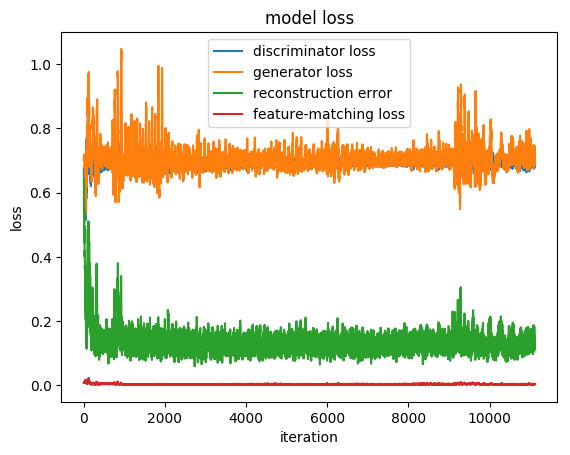

In [5]:
# plot model loss
plot(model)
show()

In [6]:
# generate new data
xgen = AnomalyDetection.generate(model, N)

2×103 Array{Float32,2}:
 0.0451976  0.0501039  0.634737  0.594176  …  0.712871  0.733714  0.0366472
 1.05207    1.05579    0.679848  0.643431     0.746089  0.752003  1.08272  

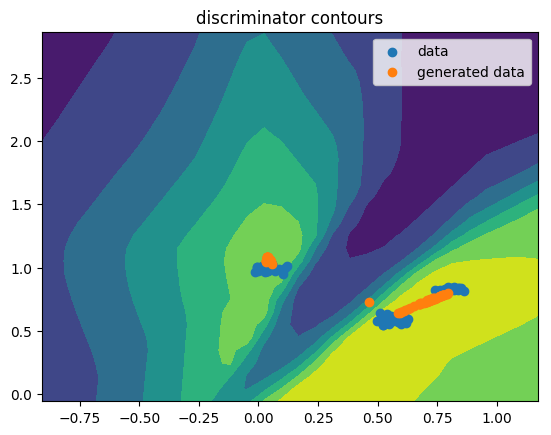

In [7]:
# plot them
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)


x = range(xl[1], stop=xl[2], length=30)
y = range(yl[1], stop=yl[2], length=30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        zz[i,j] = AnomalyDetection.discriminate(model, AnomalyDetection.Float.([x[j], y[i]]))[1]
    end
end

figure()
contourf(x, y, zz)
scatter(nX[1,:], nX[2,:], label = "data")
scatter(xgen[1,:], xgen[2,:], label = "generated data")
title("discriminator contours")
xlim(xl)
ylim(yl)
legend()
show()

Classification is based on anomaly score computed as a weighted average of reconstruction error and discriminator score
\begin{equation}
A(x) = (1-\lambda)D(x)+\lambda||x-G(z)||_{2, z \sim p(z)}
\end{equation}

In [8]:
# predict labels
AnomalyDetection.setthreshold!(model, X)
tryhat = AnomalyDetection.predict(model, X)

103-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 0
 1
 1
 1
 0
 1
 1
 1
 0

In [9]:
# get all the labels
model.lambda = 0.1
AnomalyDetection.setthreshold!(model, X)
global tryhat, tstyhat, _, _ = AnomalyDetection.rocstats(dataset, dataset, model);


 Training data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 11
  tn = 87
  fp = 3
  fn = 2
precision: 0.7857142857142857
f1score: 0.8148148148148148
recall: 0.8461538461538461
false positive rate: 0.03333333333333333
equal error rate: 0.09358974358974359

 Testing data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 12
  tn = 90
  fp = 0
  fn = 1
precision: 1.0
f1score: 0.96
recall: 0.9230769230769231
false positive rate: 0.0
equal error rate: 0.038461538461538464


In [10]:
# anomaly score contour plot
# get limits of the figure
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)

# compute the anomaly score on a grid
x = range(xl[1], stop=xl[2], length=30)
y = range(yl[1], stop=yl[2], length=30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        zz[i,j] = AnomalyDetection.anomalyscore(model, AnomalyDetection.Float.([x[j], y[i]]))
    end
end

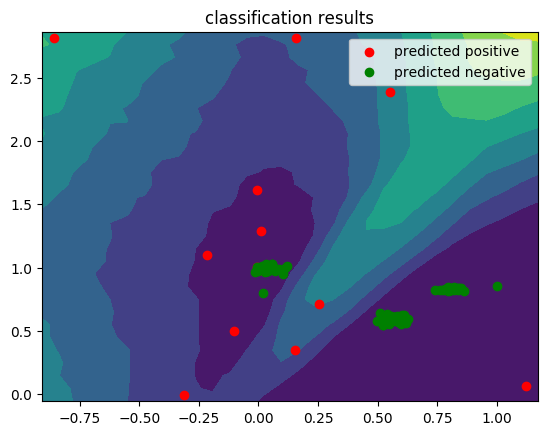

In [11]:
# plot it all
f = figure()
contourf(x, y, zz)
scatter(X[1, tryhat.==1], X[2, tryhat.==1], c = "r", 
    label = "predicted positive")
scatter(X[1, tryhat.==0], X[2, tryhat.==0], c = "g", 
    label = "predicted negative")
title("classification results")
xlim(xl)
ylim(yl)
legend()
show()

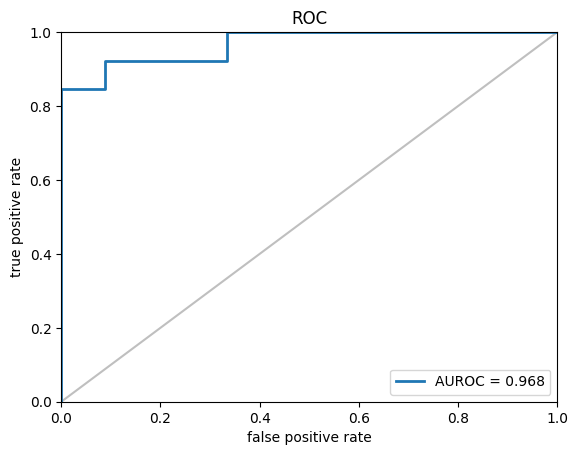

In [12]:
# plot ROC curve and compute AUROC score
ascore = AnomalyDetection.anomalyscore(model, X);
fprvec, tprvec = EvalCurves.roccurve(ascore, Y)
auroc = round(EvalCurves.auc(fprvec, tprvec),digits=3)
EvalCurves.plotroc((fprvec, tprvec, "AUROC = $(auroc)"))
show()

In [13]:
# plot EER for different settings of lambda
using MLBase: roc, correctrate, precision, recall, f1score, false_positive_rate, false_negative_rate
n = 21
lvec = range(0,stop=1,length=n)
eervec = zeros(n)
for i in 1:n
    model.lambda = lvec[i]
    AnomalyDetection.setthreshold!(model, X)
    global tryhat, tsthat, trroc, tstroc = AnomalyDetection.rocstats(dataset.data, dataset.labels,
        dataset.data, dataset.labels, model, verb = false)
    eervec[i] = (false_positive_rate(tstroc) + false_negative_rate(tstroc))/2
end

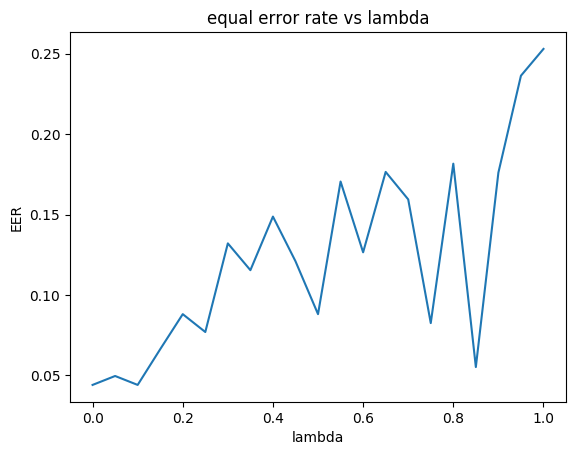

In [14]:
f = figure()
plot(lvec, eervec)
title("equal error rate vs lambda")
xlabel("lambda")
ylabel("EER")
show()